In [1]:
import numpy as np

In [2]:
import cvxpy as cp
# create a 3-dimensional variable (locations, days, hours)
x = cp.Variable((12, 10, 24))

constraints = [
  cp.sum(x, axis=(0, 2)) <= 2000, # constrain the daily usage across all locations
  x[:, :, :12] <= 100, # constrain the first 12 hours of each day at every location
  x[:, 3, :] == 1,] # constrain the usage on the fourth day to be zero

obj = cp.Minimize(cp.sum_squares(x))
prob = cp.Problem(obj, constraints)
prob.solve()
print(x.value)
print(prob.value)

ValueError: Expressions of dimension greater than 2 are not supported.

In [ ]:
!pip  install --upgrade cvxpy

  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/7b/c3/58d34792c9f5085c6c0b10821780308276814e73bda5d1741f6946e443ee/cvxpy-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.4.2
    Uninstalling cvxpy-1.4.2:
      Successfully uninstalled cvxpy-1.4.2


: 

In [15]:
n_in = 100
n_out = 200
k = 5

np.random.seed(0)

for i in range(1000):
    
    n_in = np.random.randint(10,1000)
    n_out = np.random.randint(10,1000)
    k = np.random.randint(5,min(n_in,n_out))
    
    A = np.random.randn(n_out, k)
    B = np.random.randn(k, n_in)

    H = np.random.randn(n_in,n_in)
    H = H + H.T


    x1 = np.trace(A @ B @ H @ B.T @ A.T)

    B_vector = B.reshape(-1,1)

    x2 = (B_vector.T @ (np.kron(A.T @ A, H) @ B_vector))[0,0]

    if not np.isclose(x1, x2):
        print(x1,x2)
        print(n_in,n_out,k)
        break

print("done")

MemoryError: Unable to allocate 1.56 TiB for an array with shape (482, 961, 482, 961) and data type float64

In [12]:
import torch
import torch.nn as nn


A = torch.ones(1)
A_optimize = torch.optim.Adam([A], lr=1)


In [13]:
losses = []
x = []
for i in range(100):
    loss = A**2
    # print(loss)
    losses.append(loss.item())
    x.append(A.item())
    A.grad = 2*A
    A_optimize.step()
    A_optimize.zero_grad()

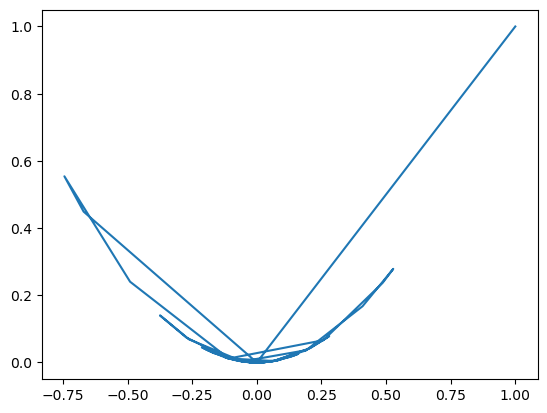

In [14]:
import matplotlib.pyplot as plt
plt.plot(x,losses)

In [ ]:
def f(**kwargs):
    print(kwargs)
    kwargs["test"] = 1
    print(kwargs)

f(a=1,b=2,test = 3)

{'a': 1, 'b': 2, 'test': 3}


In [1]:
import torch
import torch.nn as nn

class Test(nn.Module):
    def __init__(self,a):
        super(Test,self).__init__()
        self.a = a
        
a = torch.ones(3)
b = Test(a.detach().clone())

a[0] = 4
print(a)
print(b.a)

del a
print(b.a)
        


tensor([4., 1., 1.])
tensor([1., 1., 1.])
tensor([1., 1., 1.])


In [ ]:
import torch
import torch.nn.functional as F

n_out = 100
n_in = 121
k = 11
d = 1

mask_1 = torch.rand(n_out) < 0.75
mask_0 = torch.rand(n_in) < 0.75

A = torch.randn(torch.sum(mask_0).item(),k)
B = torch.randn(k,torch.sum(mask_1).item())
sparse_values_1 = torch.randn((torch.sum(~mask_1).item(),n_in))
sparse_values_2 = torch.randn((torch.sum(mask_1).item(),torch.sum(~mask_0).item()))

reconstructed_W = torch.zeros(n_out,n_in)
reconstructed_W[mask_1.unsqueeze(1) & mask_0.unsqueeze(0)] = (A @ B).flatten()
reconstructed_W[mask_1.unsqueeze(1) & ~mask_0.unsqueeze(0)] = sparse_values_2.flatten()
reconstructed_W[~mask_1] = sparse_values_1

x_test = torch.randn(d,n_in)

y = F.linear(x_test,reconstructed_W)    



RuntimeError: shape mismatch: value tensor of shape [7921] cannot be broadcast to indexing result of shape [6675]

In [12]:
y_reconstructed = torch.zeros(d,n_out)
y_reconstructed[:,~mask_1] += F.linear(x_test,sparse_values_1)
y_reconstructed[:,mask_1] += F.linear(x_test[:,~mask_0],sparse_values_2) + F.linear(F.linear(x_test[:,mask_0],B),A)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x91 and 71x11)

In [13]:
F.linear(F.linear(x_test[:,mask_0],B),A)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x91 and 71x11)

In [14]:
F.linear(x_test[:,mask_0],B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x91 and 71x11)

In [15]:
B.shape

torch.Size([11, 71])

In [1]:
import torch


def test_fn(a):
    for i in range(10):
        a[i] = i+1
    return a


a = torch.zeros(10)

a = test_fn(a)
print(a)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


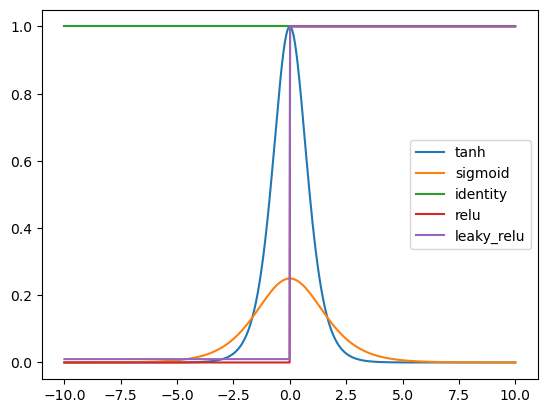

In [7]:
import torch
import matplotlib.pyplot as plt

a = torch.linspace(-10,10,1000).requires_grad_()

fns = [torch.tanh, torch.sigmoid, lambda x: x, 
       torch.relu, torch.nn.functional.leaky_relu]

grads = []
ys = []
for fn in fns:
    y = fn(a)
    ys.append(y.clone().detach().numpy())   
    y.sum().backward()
    
    grads.append(a.grad.clone())
    a.grad.zero_()

plt.figure()
for i,grad in enumerate(grads):
    plt.plot(a.detach().numpy(),grad.numpy(),label=fns[i].__name__ if i!=2 else "identity")
plt.legend()

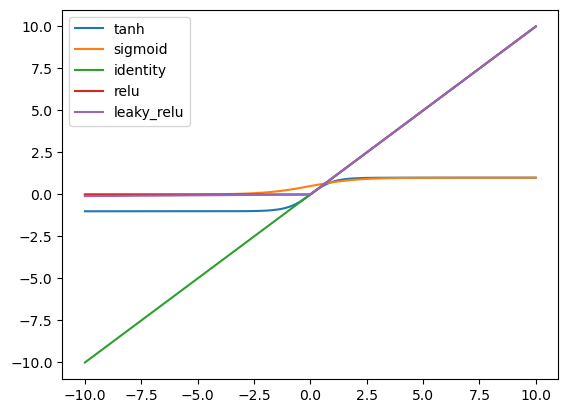

In [ ]:

plt.figure()
for i,y in enumerate(ys):
    plt.plot(a.detach().numpy(),y,label=fns[i].__name__ if i!=2 else "identity")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()